In [1]:
import numpy as np
import pandas as pd
import glob
import os
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
"""
path = r'D:\Summer Practicum\1_Data\On_Time_Marketing_Carrier_On_Time_Performance_Beginning_January_2018_2023_All_Months'
all_files = glob.glob(os.path.join(path,'*.csv'))

# Read all files in the Data folder
df = pd.concat((pd.read_csv(file,low_memory = False) for file in all_files),ignore_index = True)
"""

In [2]:
df = pd.read_csv('D:/Summer Practicum/1_Data/testing.csv')

C:\Users\izhang\AppData\Local\Temp\2\ipykernel_26164\3517558401.py:1: DtypeWarning: Columns (11,13,86,93) have mixed types. Specify dtype option on import or set low_memory=False.


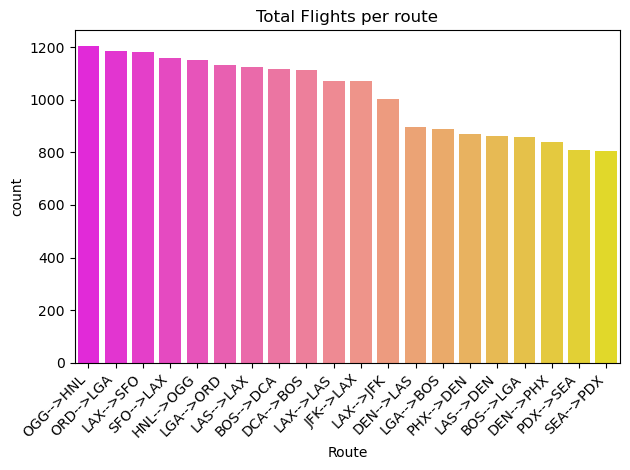

In [5]:
# Which routes are the most frequent?
# Remove all flights that were cancelled or diverted
# Pair flights by origin and destination 
frequent_routes = df.groupby(['Origin','Dest']).size().reset_index().rename(columns={0:'count'}).sort_values(by='count',ascending=False)
frequent_routes['Route'] = frequent_routes['Origin'].astype(str)+'-->'+frequent_routes['Dest'].astype(str)

# Plot top 10 routes
top_10_routes = (frequent_routes[['Route','count']].nlargest(20,'count'))
sns.barplot(data=top_10_routes,x='Route',y='count',hue='Route',palette='spring')
plt.xticks(rotation=45,ha="right")
plt.title("Total Flights per route")
plt.tight_layout()
plt.show()

In [18]:
#Total flights by Airport
total_flights = df.groupby('Origin')['Flights'].sum()
#print(total_flights)

#Total Cancellations and Diversions by Airport
cancel_by_airport = pd.DataFrame(df.groupby('Origin')['Cancelled'].sum())
diversion_by_airport = pd.DataFrame(df.groupby('Origin')['Diverted'].sum())
combined_cancel_divert = pd.merge(cancel_by_airport,diversion_by_airport,left_index=True,right_index=True).reset_index()
combined_cancel_divert['Total Cancelled or Diverted'] = combined_cancel_divert['Cancelled'] + combined_cancel_divert['Diverted']

top_10_cancel_divert = combined_cancel_divert.sort_values(by='Total Cancelled or Diverted',ascending=False)
avg_cancel_divert = combined_cancel_divert['Total Cancelled or Diverted'].mean()

#merged_cancel_divert = combined_cancel_divert[]

#merged_cancel_divert['Cancelled or Diverted per Flight'] = combined_cancel_divert['Total Cancelled or Diverted']
print(top_10_cancel_divert)
#print(f"Mean number of airport cancel divert: {avg_cancel_divert}")

    Origin  Cancelled  Diverted  Total Cancelled or Diverted
97     DFW      644.0      83.0                        727.0
204    LGA      656.0      42.0                        698.0
253    ORD      591.0      61.0                        652.0
96     DEN      580.0      66.0                        646.0
120    EWR      539.0      24.0                        563.0
..     ...        ...       ...                          ...
296    RIW        0.0       0.0                          0.0
294    RHI        0.0       0.0                          0.0
363    VLD        0.0       0.0                          0.0
366    WYS        0.0       0.0                          0.0
371    YUM        0.0       0.0                          0.0

[372 rows x 4 columns]


In [17]:
#Taxi Times by Airport 
taxi_in = df.groupby('Origin')['TaxiIn'].mean().reset_index().sort_values(by='TaxiIn',ascending=False)
taxi_out = df.groupby('Origin')['TaxiOut'].mean().reset_index().sort_values(by='TaxiOut',ascending=False)
print(taxi_out)

    Origin    TaxiOut
184    JFK  26.170657
204    LGA  25.239993
152    GUC  25.136842
120    EWR  24.461378
22     ASE  22.731132
..     ...        ...
166    HYA   8.000000
257    OTZ   7.790323
365    WRG   7.658824
370    YKM   7.076923
173    ILG   5.000000

[372 rows x 2 columns]
